# Feature engineering

In [35]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [69]:
el2022 = pd.read_csv('data/electricity-production and consumption_2022.csv',  delimiter=';',decimal=',')
el2022.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine
0,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4
1,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1
2,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6
3,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9
4,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2


In [70]:
el2022['timestamp'] = pd.to_datetime(el2022['Kuupaev (Eesti aeg)'], dayfirst=True)
el2022.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine,timestamp
0,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4,2022-01-01 00:00:00
1,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1,2022-01-01 01:00:00
2,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6,2022-01-01 02:00:00
3,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9,2022-01-01 03:00:00
4,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2,2022-01-01 04:00:00


# Create time series

In [71]:
consumption = el2022[['timestamp', 'Tarbimine']]
consumption.set_index('timestamp', inplace=True)
consumption = consumption.rename(columns = {'Tarbimine':'value'})
consumption.head()

,value
timestamp,
2022-01-01 00:00:00,899.4
2022-01-01 01:00:00,892.1
2022-01-01 02:00:00,874.3
2022-01-01 03:00:00,860.1
2022-01-01 04:00:00,842.7


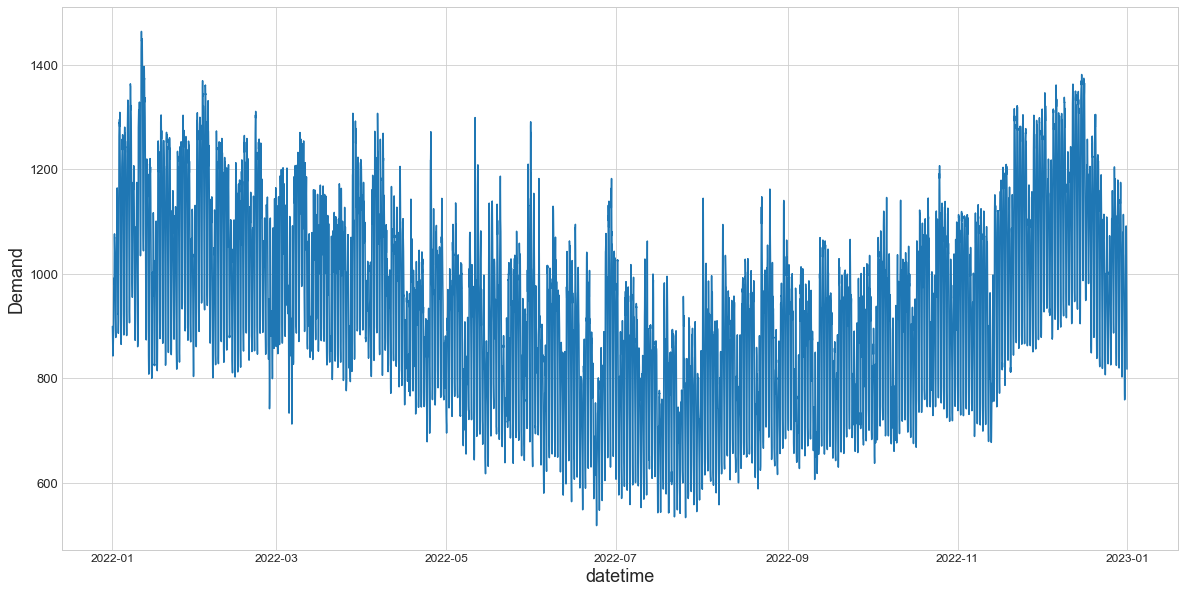

In [72]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(20,10))
p=sns.lineplot(data= consumption);
p.set_ylabel("Demand", fontsize = 18);
p.set_xlabel("datetime", fontsize = 18);
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.legend('', frameon=False);

In [73]:
production = el2022[['timestamp', 'Tootmine']]
production.set_index('timestamp', inplace=True)
production = production.rename(columns = {'Tootmine':'value'})
production.head()

,value
timestamp,
2022-01-01 00:00:00,419.5
2022-01-01 01:00:00,431.9
2022-01-01 02:00:00,428.1
2022-01-01 03:00:00,435.7
2022-01-01 04:00:00,429.2


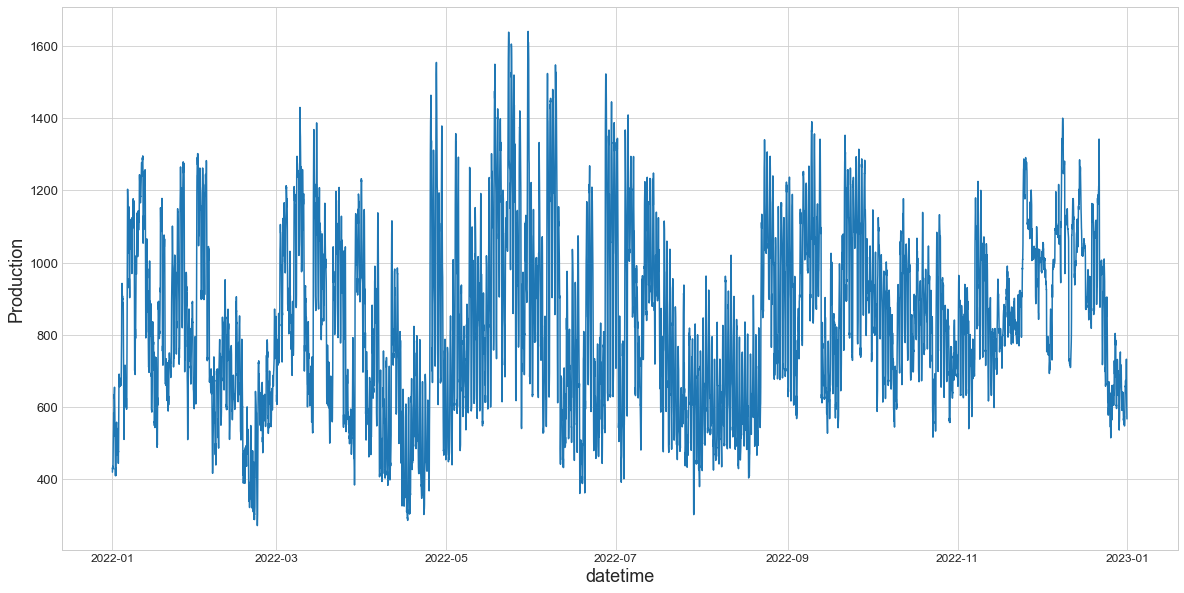

In [74]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(20,10))
p=sns.lineplot(data= production);
p.set_ylabel("Production", fontsize = 18);
p.set_xlabel("datetime", fontsize = 18);
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.legend('', frameon=False);

## Time series, time-based features

* Day of the week
* Hour
* weekend/weekday
* sin/cos of day of the week/hour
* holidays

In [75]:
datetime.date.today().weekday()+1

4

In [76]:
datetime.date.today().isoweekday()

4

Careful with weekday number, check week start day

### Building-Up and Breaking-Down Features

In [77]:
consumption['ts'] = pd.to_datetime(consumption.index.values, dayfirst=True)
consumption['wd'] = consumption['ts'].dt.dayofweek
consumption['h'] = consumption['ts'].dt.hour
consumption

,value,ts,wd,h
timestamp,,,,
2022-01-01 00:00:00,899.4,2022-01-01 00:00:00,5,0
2022-01-01 01:00:00,892.1,2022-01-01 01:00:00,5,1
2022-01-01 02:00:00,874.3,2022-01-01 02:00:00,5,2
2022-01-01 03:00:00,860.1,2022-01-01 03:00:00,5,3
2022-01-01 04:00:00,842.7,2022-01-01 04:00:00,5,4
...,...,...,...,...
2022-12-31 19:00:00,989.4,2022-12-31 19:00:00,5,19
2022-12-31 20:00:00,932.5,2022-12-31 20:00:00,5,20
2022-12-31 21:00:00,889.5,2022-12-31 21:00:00,5,21


### Mathematical transformations

In [78]:
consumption['sin_wd'] = np.sin(consumption['wd'])
consumption['cos_wd'] = np.cos(consumption['wd'])
consumption['sin_h'] = np.sin(consumption['h'])
consumption['cos_h'] = np.cos(consumption['h'])


consumption

,value,ts,wd,h,sin_wd,cos_wd,sin_h,cos_h
timestamp,,,,,,,,
2022-01-01 00:00:00,899.4,2022-01-01 00:00:00,5,0,-0.958924,0.283662,0.000000,1.000000
2022-01-01 01:00:00,892.1,2022-01-01 01:00:00,5,1,-0.958924,0.283662,0.841471,0.540302
2022-01-01 02:00:00,874.3,2022-01-01 02:00:00,5,2,-0.958924,0.283662,0.909297,-0.416147
2022-01-01 03:00:00,860.1,2022-01-01 03:00:00,5,3,-0.958924,0.283662,0.141120,-0.989992
2022-01-01 04:00:00,842.7,2022-01-01 04:00:00,5,4,-0.958924,0.283662,-0.756802,-0.653644
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,989.4,2022-12-31 19:00:00,5,19,-0.958924,0.283662,0.149877,0.988705
2022-12-31 20:00:00,932.5,2022-12-31 20:00:00,5,20,-0.958924,0.283662,0.912945,0.408082
2022-12-31 21:00:00,889.5,2022-12-31 21:00:00,5,21,-0.958924,0.283662,0.836656,-0.547729


### Dummy variables

#### Primitive example, Avoiding MultiCollinearity 

In [79]:
def is_weekend(d):
    if d.weekday() > 5:
        return "weekend"
    else:
        return "workday"
    
consumption['daytype'] = consumption.apply(lambda x: is_weekend(x['ts']), axis=1)

In [80]:
pd.get_dummies(consumption['daytype'])

,weekend,workday
timestamp,,
2022-01-01 00:00:00,0,1
2022-01-01 01:00:00,0,1
2022-01-01 02:00:00,0,1
2022-01-01 03:00:00,0,1
2022-01-01 04:00:00,0,1
...,...,...
2022-12-31 19:00:00,0,1
2022-12-31 20:00:00,0,1
2022-12-31 21:00:00,0,1


In [81]:
pd.get_dummies(consumption['daytype'],drop_first=True)

,workday
timestamp,
2022-01-01 00:00:00,1
2022-01-01 01:00:00,1
2022-01-01 02:00:00,1
2022-01-01 03:00:00,1
2022-01-01 04:00:00,1
...,...
2022-12-31 19:00:00,1
2022-12-31 20:00:00,1
2022-12-31 21:00:00,1


In [82]:
def is_weekend(d):
    if d.weekday() > 5:
        return True
    else:
        return False
    
consumption['daytype'] = consumption.apply(lambda x: is_weekend(x['ts']), axis=1)

consumption

,value,ts,wd,h,sin_wd,cos_wd,sin_h,cos_h,daytype
timestamp,,,,,,,,,
2022-01-01 00:00:00,899.4,2022-01-01 00:00:00,5,0,-0.958924,0.283662,0.000000,1.000000,False
2022-01-01 01:00:00,892.1,2022-01-01 01:00:00,5,1,-0.958924,0.283662,0.841471,0.540302,False
2022-01-01 02:00:00,874.3,2022-01-01 02:00:00,5,2,-0.958924,0.283662,0.909297,-0.416147,False
2022-01-01 03:00:00,860.1,2022-01-01 03:00:00,5,3,-0.958924,0.283662,0.141120,-0.989992,False
2022-01-01 04:00:00,842.7,2022-01-01 04:00:00,5,4,-0.958924,0.283662,-0.756802,-0.653644,False
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,989.4,2022-12-31 19:00:00,5,19,-0.958924,0.283662,0.149877,0.988705,False
2022-12-31 20:00:00,932.5,2022-12-31 20:00:00,5,20,-0.958924,0.283662,0.912945,0.408082,False
2022-12-31 21:00:00,889.5,2022-12-31 21:00:00,5,21,-0.958924,0.283662,0.836656,-0.547729,False


In [83]:
consumption = consumption.drop(columns=['ts'])
consumption

,value,wd,h,sin_wd,cos_wd,sin_h,cos_h,daytype
timestamp,,,,,,,,
2022-01-01 00:00:00,899.4,5,0,-0.958924,0.283662,0.000000,1.000000,False
2022-01-01 01:00:00,892.1,5,1,-0.958924,0.283662,0.841471,0.540302,False
2022-01-01 02:00:00,874.3,5,2,-0.958924,0.283662,0.909297,-0.416147,False
2022-01-01 03:00:00,860.1,5,3,-0.958924,0.283662,0.141120,-0.989992,False
2022-01-01 04:00:00,842.7,5,4,-0.958924,0.283662,-0.756802,-0.653644,False
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,989.4,5,19,-0.958924,0.283662,0.149877,0.988705,False
2022-12-31 20:00:00,932.5,5,20,-0.958924,0.283662,0.912945,0.408082,False
2022-12-31 21:00:00,889.5,5,21,-0.958924,0.283662,0.836656,-0.547729,False


## External features

### Temperature

In [84]:
raw_weather = pd.read_csv('data/weather_2022.csv',  delimiter=';', decimal='.', index_col = False)
raw_weather['timestamp'] = pd.to_datetime(raw_weather['Local time in Tallinn (airport)'], dayfirst=True)
temperature = raw_weather[['timestamp', 'T']]
temperature.set_index('timestamp', inplace=True)
consumption = consumption.join(temperature)

consumption = consumption.reset_index().drop_duplicates(subset='timestamp', keep='last').set_index('timestamp')

consumption

,value,wd,h,sin_wd,cos_wd,sin_h,cos_h,daytype,T
timestamp,,,,,,,,,
2022-01-01 00:00:00,899.4,5,0,-0.958924,0.283662,0.000000,1.000000,False,-1.0
2022-01-01 01:00:00,892.1,5,1,-0.958924,0.283662,0.841471,0.540302,False,-0.6
2022-01-01 02:00:00,874.3,5,2,-0.958924,0.283662,0.909297,-0.416147,False,0.0
2022-01-01 03:00:00,860.1,5,3,-0.958924,0.283662,0.141120,-0.989992,False,-0.1
2022-01-01 04:00:00,842.7,5,4,-0.958924,0.283662,-0.756802,-0.653644,False,-0.1
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,989.4,5,19,-0.958924,0.283662,0.149877,0.988705,False,5.4
2022-12-31 20:00:00,932.5,5,20,-0.958924,0.283662,0.912945,0.408082,False,5.7
2022-12-31 21:00:00,889.5,5,21,-0.958924,0.283662,0.836656,-0.547729,False,5.8


For example - prediction for Estonia, but what is temperature for "Estonia":
* weighted average etc

Other weather featured?

"Feels like" feature


For example, for solar panels or wind generators, other features as wind speed and direction or cloudness may be needed

### Categorical variables

In [85]:
raw_weather 

,Local time in Tallinn (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,timestamp
0,31.12.2022 23:00,5.8,744.1,747.2,-0.7,93.0,Wind blowing from the south-southwest,3.0,NaN,NaN,...,NaN,35.0,4.8,0.1,3.0,NaN,NaN,NaN,NaN,2022-12-31 23:00:00
1,31.12.2022 22:00,5.9,744.3,747.3,-0.5,93.0,Wind blowing from the south-west,4.0,9.0,10.0,...,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN,2022-12-31 22:00:00
2,31.12.2022 21:00,5.8,744.4,747.4,-0.3,93.0,Wind blowing from the south-southwest,4.0,8.0,NaN,...,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN,2022-12-31 21:00:00
3,31.12.2022 20:00,5.7,744.8,747.8,-0.5,94.0,Wind blowing from the south-west,4.0,9.0,NaN,...,NaN,35.0,4.8,0.5,12.0,NaN,NaN,NaN,NaN,2022-12-31 20:00:00
4,31.12.2022 19:00,5.4,744.8,747.9,-0.8,96.0,Wind blowing from the south-west,4.0,8.0,NaN,...,NaN,20.0,4.8,0.3,3.0,NaN,NaN,NaN,NaN,2022-12-31 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,01.01.2022 04:00,-0.1,748.8,751.9,0.5,100.0,Wind blowing from the north-east,2.0,NaN,NaN,...,NaN,0.9,-0.1,1.0,3.0,NaN,NaN,NaN,NaN,2022-01-01 04:00:00
8728,01.01.2022 03:00,-0.1,748.5,751.6,0.4,99.0,Wind blowing from the north-east,1.0,NaN,NaN,...,NaN,0.4,-0.2,0.8,3.0,NaN,NaN,NaN,NaN,2022-01-01 03:00:00
8729,01.01.2022 02:00,0.0,748.2,751.3,0.2,99.0,Wind blowing from the east,1.0,NaN,NaN,...,NaN,0.4,-0.1,0.5,3.0,NaN,NaN,NaN,NaN,2022-01-01 02:00:00
8730,01.01.2022 01:00,-0.6,748.3,751.4,1.2,99.0,Wind blowing from the north-northwest,1.0,NaN,NaN,...,NaN,0.3,-0.7,0.2,3.0,NaN,NaN,NaN,NaN,2022-01-01 01:00:00


In [86]:
wind = raw_weather[['timestamp', 'DD']]
wind.set_index('timestamp', inplace=True)
wind

,DD
timestamp,
2022-12-31 23:00:00,Wind blowing from the south-southwest
2022-12-31 22:00:00,Wind blowing from the south-west
2022-12-31 21:00:00,Wind blowing from the south-southwest
2022-12-31 20:00:00,Wind blowing from the south-west
2022-12-31 19:00:00,Wind blowing from the south-west
...,...
2022-01-01 04:00:00,Wind blowing from the north-east
2022-01-01 03:00:00,Wind blowing from the north-east
2022-01-01 02:00:00,Wind blowing from the east


In [87]:
print("Wind blowing from the south-southwest".replace('Wind blowing from the ', ''))

south-southwest


In [88]:
wind['DD'] = wind['DD'].str.replace('Wind blowing from the ', '')
wind

,DD
timestamp,
2022-12-31 23:00:00,south-southwest
2022-12-31 22:00:00,south-west
2022-12-31 21:00:00,south-southwest
2022-12-31 20:00:00,south-west
2022-12-31 19:00:00,south-west
...,...
2022-01-01 04:00:00,north-east
2022-01-01 03:00:00,north-east
2022-01-01 02:00:00,east


In [89]:
pd.get_dummies(wind['DD'])

,"Calm, no wind",east,east-northeast,east-southeast,north,north-east,north-northeast,north-northwest,north-west,south,south-east,south-southeast,south-southwest,south-west,west,west-northwest,west-southwest
timestamp,,,,,,,,,,,,,,,,,
2022-12-31 23:00:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2022-12-31 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2022-12-31 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2022-12-31 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2022-12-31 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 04:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-01 03:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-01 02:00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Scales and measurments

https://studyonline.unsw.edu.au/blog/types-of-data


* from sklearn.preprocessing import OneHotEncoder
* from sklearn.preprocessing import OrdinalEncoder -- to integer

# Scaling and normalization

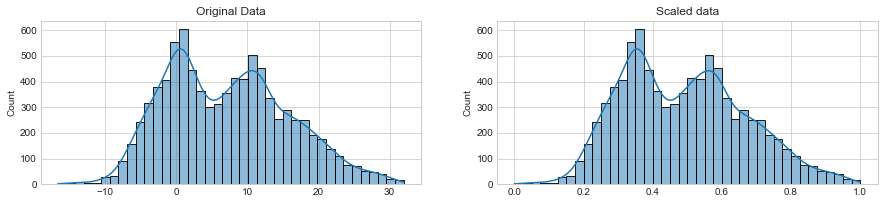

In [91]:
from sklearn.preprocessing import minmax_scale
original_data = temperature

# mix-max scale the data between 0 and 1
scaled_data = minmax_scale(temperature)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

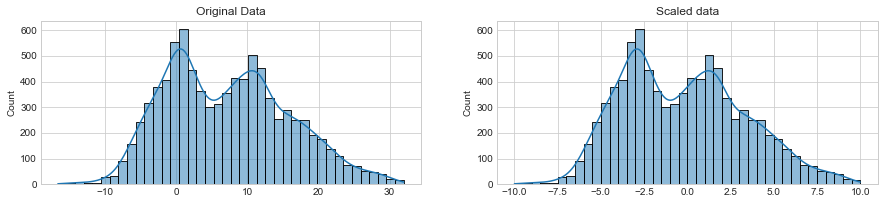

In [92]:
original_data = temperature

# mix-max scale the data between a and b
scaled_data = minmax_scale(temperature,  feature_range=(-10,10))

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

# Feature transformation

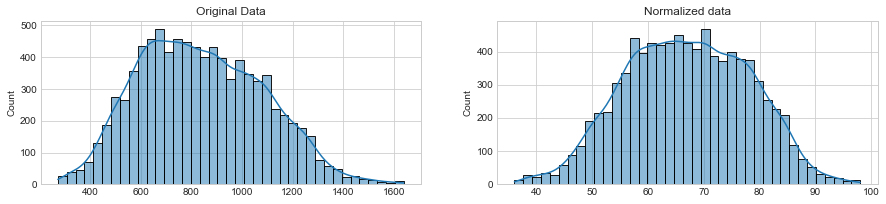

In [93]:
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(production['value'])
original_data = production
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

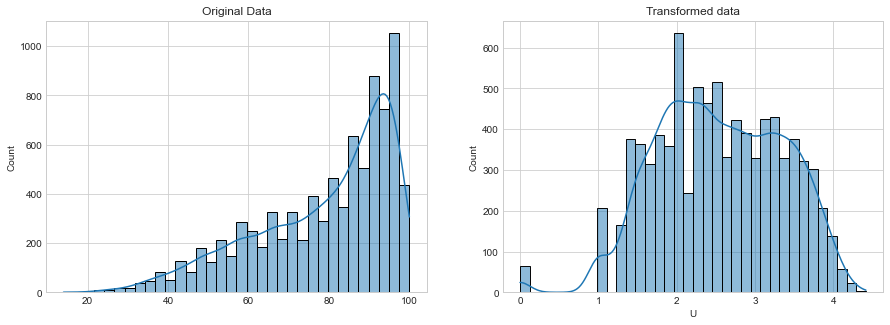

In [94]:
original_data = raw_weather [['U']]

#transformed_data = np.power(original_data, 1/2)
transformed_data = np.power(max(original_data['U'])-original_data['U'], 1/3)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(transformed_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Transformed data")
plt.show()

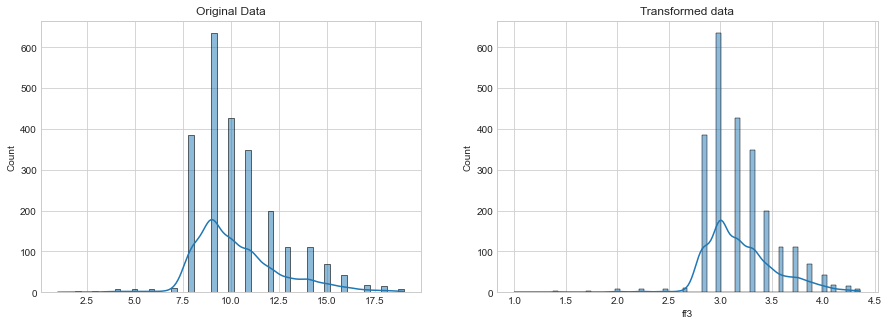

In [95]:
original_data = raw_weather [['ff3']]

transformed_data = np.power(original_data['ff3'], 1/2)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(transformed_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Transformed data")
plt.show()

# Mutual information

In [96]:
consumption=consumption.fillna(0)

from sklearn.feature_selection import mutual_info_regression

discrete_features = consumption.dtypes == int

mi_scores = mutual_info_regression(consumption, consumption['value'], discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=consumption.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores


value      7.589701
T          0.305750
cos_h      0.298925
h          0.297690
sin_h      0.212480
sin_wd     0.060212
wd         0.060209
cos_wd     0.060076
daytype    0.024405
Name: MI Scores, dtype: float64

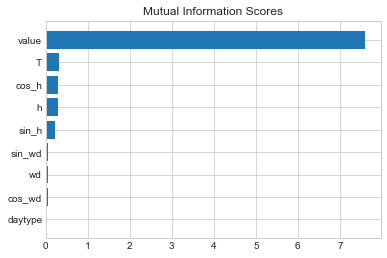

In [97]:
mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores");

### Pairplot

In [98]:
consumption

,value,wd,h,sin_wd,cos_wd,sin_h,cos_h,daytype,T
timestamp,,,,,,,,,
2022-01-01 00:00:00,899.4,5,0,-0.958924,0.283662,0.000000,1.000000,False,-1.0
2022-01-01 01:00:00,892.1,5,1,-0.958924,0.283662,0.841471,0.540302,False,-0.6
2022-01-01 02:00:00,874.3,5,2,-0.958924,0.283662,0.909297,-0.416147,False,0.0
2022-01-01 03:00:00,860.1,5,3,-0.958924,0.283662,0.141120,-0.989992,False,-0.1
2022-01-01 04:00:00,842.7,5,4,-0.958924,0.283662,-0.756802,-0.653644,False,-0.1
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,989.4,5,19,-0.958924,0.283662,0.149877,0.988705,False,5.4
2022-12-31 20:00:00,932.5,5,20,-0.958924,0.283662,0.912945,0.408082,False,5.7
2022-12-31 21:00:00,889.5,5,21,-0.958924,0.283662,0.836656,-0.547729,False,5.8


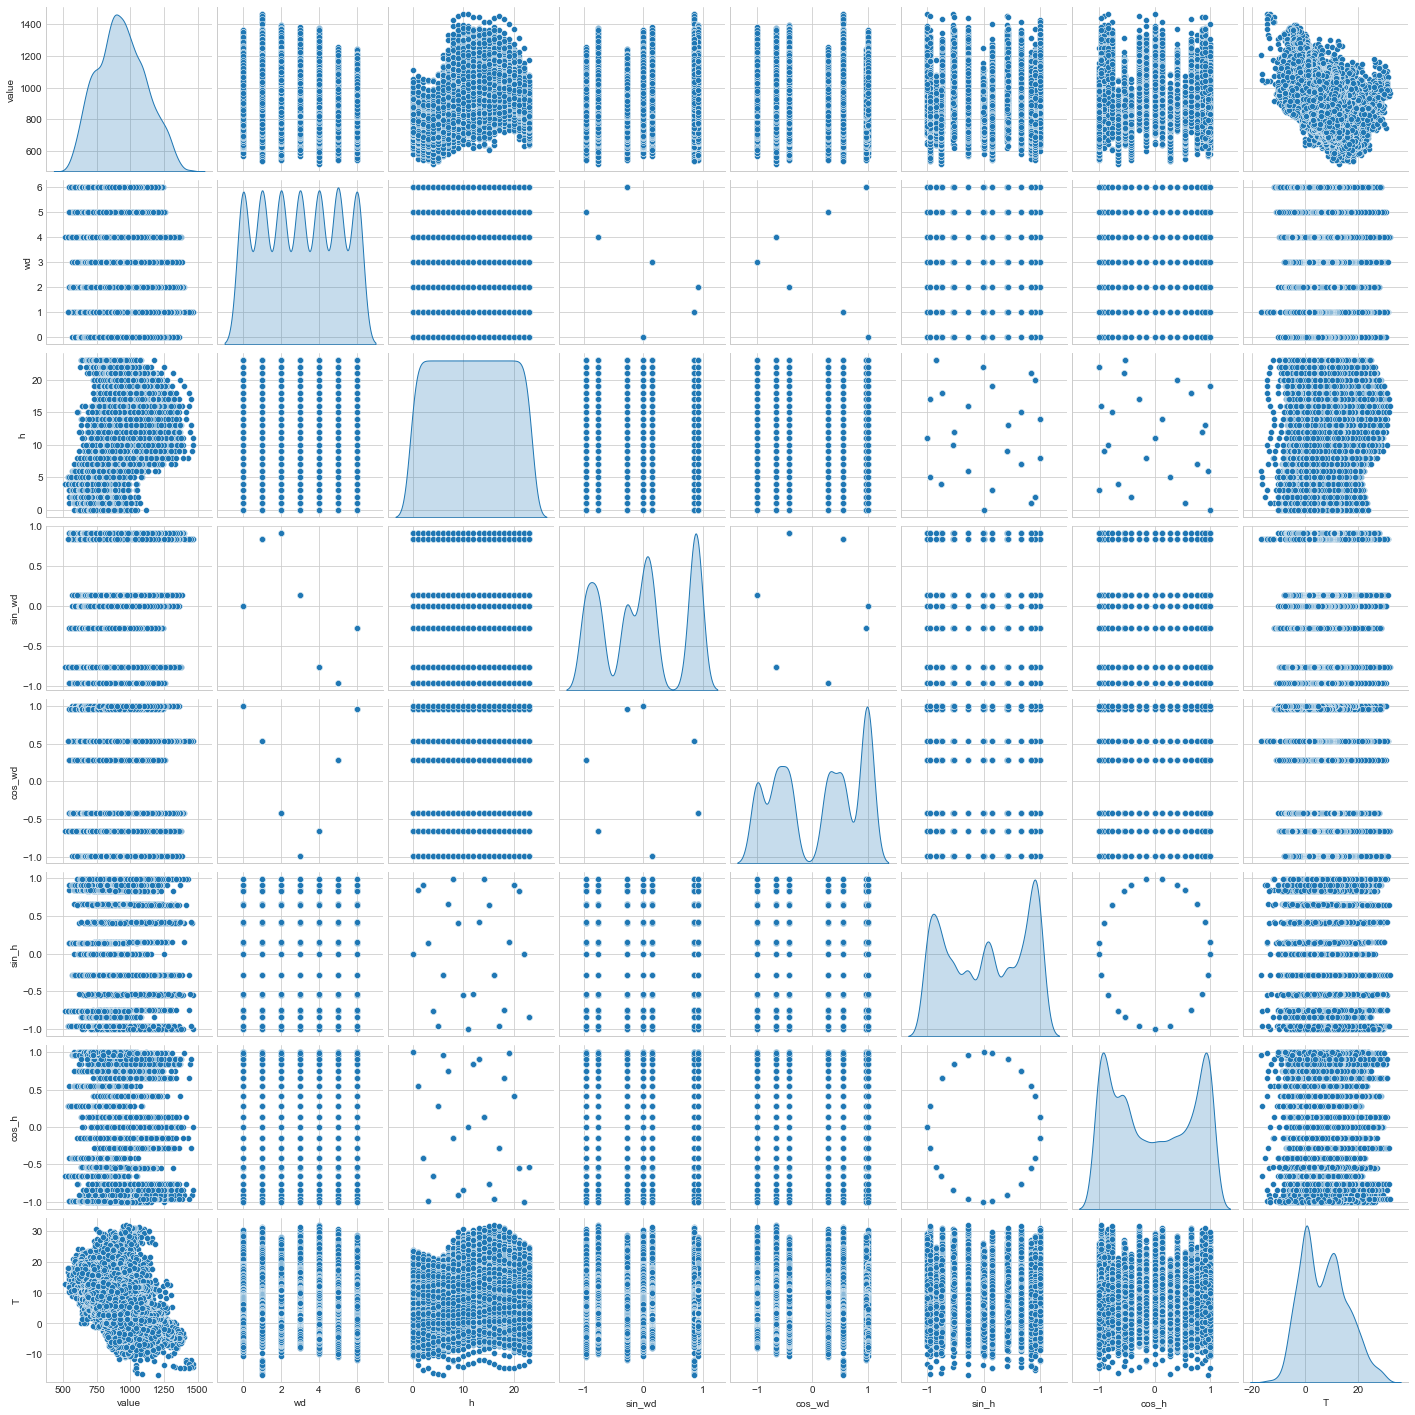

In [99]:
sns.pairplot(consumption[['value','wd','h','sin_wd','cos_wd','sin_h',
                         'cos_h', 'T']], diag_kind='kde');

## Correlation matrix

In [100]:
consumption.corr()

,value,wd,h,sin_wd,cos_wd,sin_h,cos_h,daytype,T
value,1.000000,-2.291020e-01,3.749005e-01,1.767161e-01,-1.160249e-01,2.234935e-02,2.998724e-02,-1.907370e-01,-0.470132
wd,-0.229102,1.000000e+00,2.167785e-17,-6.539954e-01,-8.357878e-02,3.816244e-19,9.924282e-19,6.102790e-01,-0.010193
h,0.374900,2.167785e-17,1.000000e+00,-3.358975e-17,-1.283917e-17,-9.237836e-02,-1.631834e-01,-6.704892e-18,0.116050
sin_wd,0.176716,-6.539954e-01,-3.358975e-17,1.000000e+00,-2.942372e-02,6.791783e-19,2.384408e-19,-1.596941e-01,0.012004
cos_wd,-0.116025,-8.357878e-02,-1.283917e-17,-2.942372e-02,1.000000e+00,2.469674e-20,-1.186151e-18,4.742726e-01,-0.037155
sin_h,0.022349,3.816244e-19,-9.237836e-02,6.791783e-19,2.469674e-20,1.000000e+00,3.988493e-02,-6.758924e-19,-0.008424
cos_h,0.029987,9.924282e-19,-1.631834e-01,2.384408e-19,-1.186151e-18,3.988493e-02,1.000000e+00,-1.052075e-18,0.004427
daytype,-0.190737,6.102790e-01,-6.704892e-18,-1.596941e-01,4.742726e-01,-6.758924e-19,-1.052075e-18,1.000000e+00,-0.020068
T,-0.470132,-1.019304e-02,1.160501e-01,1.200371e-02,-3.715467e-02,-8.423908e-03,4.426728e-03,-2.006836e-02,1.000000


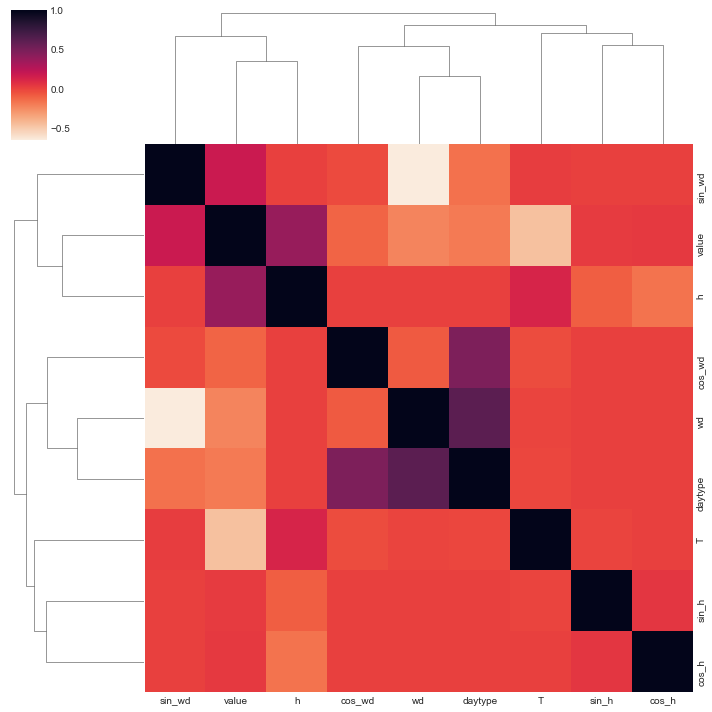

In [68]:
sns.clustermap(consumption.corr(), cmap="rocket_r");